Perform the necessary imports

In [123]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.preprocessing import text, sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Activation, Dropout, Dense
from sklearn.model_selection import train_test_split
#import keras

****************************************************************************************************

So, here's what we'll do.

1.Understand the data using visualization

2.Use pandas to do data manipulation such as fill NaNs', drop redundant training examples, generate labels etc.,

3.Convert the text into a sequence(list of lists(sequence)), using tokenizer. Pad the sequence to form a 2D numpy array.

4.Build the Neural Network Model using Keras.

5.Train the model using an optimizer such as 'adam' or 'adagrad' and loss function 'binary_crossentropy'. 

6.Start predicting!

****************************************************************************************************

1.Data visualization and 
2.Use pandas to do data manipulation such as fill NaNs', drop redundant training examples, generate labels etc.,

In [124]:
df = pd.read_csv('text_emotion_train_val_set.csv')
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [125]:
df = df.loc[df['sentiment'].isin(['happiness','sadness','surprise','hate','love'])]

In [126]:
df['sentiment'] = df['sentiment'].replace(['happiness'], 'happy')
df['sentiment'] = df['sentiment'].replace(['sadness'], 'sad')

In [127]:
df.head(10)

,tweet_id,sentiment,author,content
1,1956967666,sad,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sad,coolfunky,Funeral ceremony...gloomy friday...
6,1956968487,sad,ShansBee,"I should be sleep, but im not! thinking about ..."
8,1956969035,sad,nic0lepaula,@charviray Charlene my love. I miss you
9,1956969172,sad,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?
12,1956970047,sad,Danied32,Ugh! I have to beat this stupid song to get to...
13,1956970424,sad,Samm_xo,@BrodyJenner if u watch the hills in london u ...
14,1956970860,surprise,okiepeanut93,Got the news
15,1956971077,sad,Sim_34,The storm is here and the electricity is gone
16,1956971170,love,poppygallico,@annarosekerr agreed


In [128]:
print(len(df))
print(type(df))
print(df.ndim)
print(df.shape)
print(df.dtypes)
print(df.size)

17726
<class 'pandas.core.frame.DataFrame'>
2
(17726, 4)
tweet_id      int64
sentiment    object
author       object
content      object
dtype: object
70904


Dropping unnecessary layers that do not contribute to emotion classification

In [129]:
df = df.drop(['tweet_id', 'author'], axis=1)

In [130]:
df.head()

,sentiment,content
1,sad,Layin n bed with a headache ughhhh...waitin o...
2,sad,Funeral ceremony...gloomy friday...
6,sad,"I should be sleep, but im not! thinking about ..."
8,sad,@charviray Charlene my love. I miss you
9,sad,@kelcouch I'm sorry at least it's Friday?


In [131]:
df.shape

(17726, 2)

Check the frequency/no. of times different emotions are labelled

In [133]:
df['sentiment'].value_counts()

happy       5209
sad         5165
love        3842
surprise    2187
hate        1323
Name: sentiment, dtype: int64

It is not a skewed data set for the 'sentiment' feature.
Becasue 'sentiment' is not  a feature. It is the label(y)
Plotting the above output as a bar graph

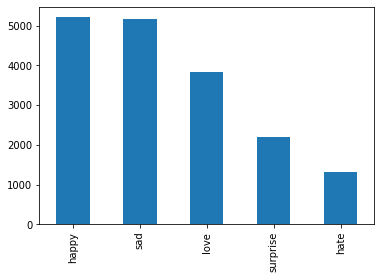

In [134]:
df['sentiment'].value_counts().plot.bar()

Plotting the same output for percentage visualization.
It says that 21.5% of the data set are neutral features

In [135]:
df['sentiment'].value_counts() / len(df)

happy       0.293862
sad         0.291380
love        0.216744
surprise    0.123378
hate        0.074636
Name: sentiment, dtype: float64

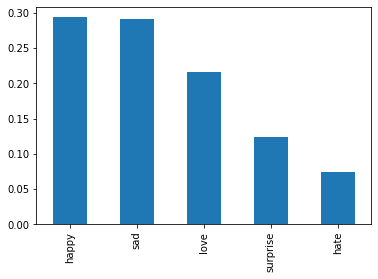

In [136]:
(df['sentiment'].value_counts() / len(df)).plot.bar()

In [137]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

Relieved that there isn't. 

the '.sample' method randomly shuffles the data frame. 'frac=1' indicates that the entire fraction of data is to be considered after shuffling. 'reset_index' resets the row indexes after shuffling. drop=True makes sure that the old index values are not retained in the data frrame.

In [138]:
print(df.head())
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

  sentiment                                            content
1       sad  Layin n bed with a headache  ughhhh...waitin o...
2       sad                Funeral ceremony...gloomy friday...
6       sad  I should be sleep, but im not! thinking about ...
8       sad            @charviray Charlene my love. I miss you
9       sad         @kelcouch I'm sorry  at least it's Friday?
(17726, 2)


,sentiment,content
0,hate,only gets spam in her college email account no...
1,surprise,OMG...the heater in my room has been on all da...
2,love,@RachelleKOMO Very cute! Don't miss out on pu...
3,hate,@mileycyrus my computer is being stupid and wo...
4,happy,fireworks @ KBOOM concert... second best I've ...


Generate labels from the data set column 'sentiment'

In [139]:
y_pandas_df = pd.get_dummies(df['sentiment'])
print(type(y_pandas_df))
print(y_pandas_df.shape)
print(y_pandas_df.ndim)
y_pandas_df.head()

<class 'pandas.core.frame.DataFrame'>
(17726, 5)
2


,happy,hate,love,sad,surprise
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [140]:
y = y_pandas_df.values
print("properties of y")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(y), y.ndim, y.shape, y.size, y.dtype, y.itemsize))

properties of y
type : <class 'numpy.ndarray'>, dimensions : 2, shape : (17726, 5), total no. of elements : 88630, data type of each element: uint8, size of each element 1 bytes


In [141]:
x_train, x_test, y_train, y_test = train_test_split(df,y, random_state=4, test_size=0.2)

In [142]:
x_train = x_train.drop(['sentiment'], axis=1)
x_test = x_test.drop(['sentiment'], axis=1)

Flatten the array from 2D to 1D.

In [143]:
x_train = x_train.values.flatten()
print(x_train.shape)
x_test = x_test.values.flatten()
print(x_test.shape)

(14180,)
(3546,)


In [144]:
print(x_train)
print("properties of x_train")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(x_train), x_train.ndim, x_train.shape, x_train.size, x_train.dtype, x_train.itemsize))

['@clarinette02 I am most honoured to receive a Twit tout en francais. But my French not good enough to pick up les nuances en 140...   LOL'
 "Well dinner was disastrous my uncle lashed out at me for no reason he just told me to shut up ! ?? Confused since i wasn't even talking"
 'got back from the party...suprisingly awesome, NEED to dance more often! overall, awesome night'
 ...
 "@R1CC1 that's funny...well, i'll say bye again b/c i'm really THAT delirious...lol... i worked 13 hrs i think...crazy...anyhoo bye lady!"
 '@davedays i heard one of your songs, and you have an amazing voice  i was stunned'
 'i love monday night lineup  just wish it was over the span of the week. gossip girl - big bang theory - how i met your mother - the hills']
properties of x_train
type : <class 'numpy.ndarray'>, dimensions : 1, shape : (14180,), total no. of elements : 14180, data type of each element: object, size of each element 8 bytes


In [145]:
print(x_test)
print("properties of x_test")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(x_test), x_test.ndim, x_test.shape, x_test.size, x_test.dtype, x_test.itemsize))

['Happy Star Wars Day! .... May the 4th Be with You!'
 "@aidadoll he thinks he's a gangsterrr  his ass don't even fit in G Unit. &amp; I know :| )))))"
 "Checking out Ciege Cagalawan's S/S Collection and I am regretting that I did not see his collection tonight  I got invites!"
 ...
 "Fighting a sore throat.. Few more days hard training then rest next week for Sunday race.. Oooohhh sun's out... Nope.. Gone..."
 'Thinks FML should changed to LML (love my life)' '@SarahJacinta Thanks!']
properties of x_test
type : <class 'numpy.ndarray'>, dimensions : 1, shape : (3546,), total no. of elements : 3546, data type of each element: object, size of each element 8 bytes


Necessary Global Variables.

In [146]:
list_of_classes = ['happiness','sadness','surprise','hate','love']
max_features = 20000
max_text_length = 400
embedding_dims = 50
batch_size = 32
epochs = 3
num_filters_1 = 250
num_filters_2 = 250
filter_size = 3

3.Convert the text into a sequence(list of lists(sequence)), using tokenizer. Pad the sequence to form a 2D numpy array.

In [147]:
x_tokenizer = text.Tokenizer(num_words=max_features)
x_tokenizer.fit_on_texts(list(x_train))
x_tokenized = x_tokenizer.texts_to_sequences(x_train)
x_train= sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

4.Build the Neural Network Model using Keras.

In [32]:
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=max_text_length))
model.add(Dropout(0.2))

model.add(Conv1D(filters=num_filters_1, kernel_size=filter_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_filters_2))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('sigmoid'))


5.Train the model using an optimizer such as 'adam' or 'adagrad' and loss function 'binary_crossentropy'. 

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 50)           1000000   
_________________________________________________________________
dropout (Dropout)            (None, 400, 50)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)               0

In [34]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Train on 14180 samples
Epoch 1/3
14180/14180 [==============================] - 38s 3ms/sample - loss: 0.4459 - accuracy: 0.8100
Epoch 2/3
14180/14180 [==============================] - 32s 2ms/sample - loss: 0.3708 - accuracy: 0.8395
Epoch 3/3
14180/14180 [==============================] - 34s 2ms/sample - loss: 0.3005 - accuracy: 0.8741


In [35]:
# model.save('emo_class_keras_model.h5')

6.Start predicting!

In [36]:
from tensorflow.python.keras.models import load_model

def predict(test_set):
    global x_tokenizer
    model2 = load_model('emo_class_keras_model.h5')
    #test_df = pd.read_csv(test_set)
    #x_test = test_df['comment'].values
    x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
    x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)
    y_testing = model2.predict(x_testing, verbose = 1)
#     sample_submission = pd.read_csv("data/submission.csv")
#     sample_submission[list_of_classes] = y_testing
#     sample_submission.to_csv("solution.csv", index=False)


In [37]:
#x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)
y_testing = model.predict(x_testing, verbose = 1)

14180/14180 [==============================] - 9s 604us/sample


In [38]:
y_testing

array([[4.45694895e-03, 2.34399453e-01, 6.14977116e-03, 7.60237575e-01,
        2.81576458e-02],
       [9.24988508e-01, 2.80274544e-03, 2.28902083e-02, 1.29102906e-02,
        5.85964844e-02],
       [3.57790478e-02, 3.07672948e-04, 9.22248960e-01, 7.70224771e-03,
        1.41663775e-02],
       ...,
       [7.34894693e-01, 1.52379218e-02, 5.83438762e-02, 1.50061846e-01,
        1.20455198e-01],
       [2.37444155e-02, 4.30695787e-02, 4.41861711e-03, 8.60565305e-01,
        3.08787487e-02],
       [2.45412737e-01, 1.31901726e-01, 1.55359060e-01, 2.82798380e-01,
        3.33234668e-01]], dtype=float32)

In [151]:
string = 'I am upset you so much'
test = [string]

string_tokenized = x_tokenizer.texts_to_sequences(test)
x_testing = sequence.pad_sequences(string_tokenized, maxlen=400)
y_testing = model.predict(x_testing, verbose = 1)

list_of_classes = ['happiness','sadness','surprise','hate','love']
y_class = list_of_classes[y_testing.argmax()]
y_class

1/1 [==============================] - 0s 3ms/sample


'hate'

In [121]:
string = 'you must be kidding me'
test = [string]

In [122]:
test

['you must be kidding me']

In [120]:
x_testing

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [110]:
y_testing

array([[0.26367304, 0.16287668, 0.18353966, 0.29460877, 0.3536721 ]],
      dtype=float32)

In [111]:
y_testing.argmax()

4

In [112]:
list_of_classes = ['happiness','sadness','surprise','hate','love']

In [116]:
y_class = list_of_classes[y_testing.argmax()]

In [117]:
y_class

'love'

In [148]:
import os
path="static/img"
filelist = os.listdir(path)

In [149]:
filelist[0:5]

['Doraemon,Brrr.jpg',
 'moring.jpg',
 'take a rest,rabbit.jpg',
 'scared, rabbit, white.jpg',
 'are you there,cat,white.jpg']

In [150]:
res = [sub.replace('sad', 'sadness') for sub in filelist]
res = [sub.replace('happy', 'happiness') for sub in res]

In [151]:
n = 0 
for name in filelist:
    #original names
    oldname= path + os.sep + filelist[n]   
    #new names
    newname= path + os.sep + res[n]
    os.rename(oldname,newname)  
    
    n+=1
    
    print(n+1,oldname,'======>',newname)

2 static/img/Doraemon,Brrr.jpg ======> static/img/Doraemon,Brrr.jpg
3 static/img/moring.jpg ======> static/img/moring.jpg
4 static/img/take a rest,rabbit.jpg ======> static/img/take a rest,rabbit.jpg
5 static/img/scared, rabbit, white.jpg ======> static/img/scared, rabbit, white.jpg
6 static/img/are you there,cat,white.jpg ======> static/img/are you there,cat,white.jpg
7 static/img/getting pumped!.jpg ======> static/img/getting pumped!.jpg
8 static/img/night,couple.jpg ======> static/img/night,couple.jpg
9 static/img/oh,quit flattering me.jpg ======> static/img/oh,quit flattering me.jpg
10 static/img/I love you.jpg ======> static/img/I love you.jpg
11 static/img/hate,dog,white,2.jpg ======> static/img/hate,dog,white,2.jpg
12 static/img/Stitch,dog,blue,cute,thank you.jpg ======> static/img/Stitch,dog,blue,cute,thank you.jpg
13 static/img/Newsflash.jpg ======> static/img/Newsflash.jpg
14 static/img/shopping,couple2.jpg ======> static/img/shopping,couple2.jpg
15 static/img/shudder,scare,b

275 static/img/for you.jpg ======> static/img/for you.jpg
276 static/img/love,couple2.jpg ======> static/img/love,couple2.jpg
277 static/img/Stitch,dog,blue,cute,lazy,off,lay.jpg ======> static/img/Stitch,dog,blue,cute,lazy,off,lay.jpg
278 static/img/on my way.jpg ======> static/img/on my way.jpg
279 static/img/green,gift,cute.jpg ======> static/img/green,gift,cute.jpg
280 static/img/yes,rabbit.jpg ======> static/img/yes,rabbit.jpg
281 static/img/sleep,couple,love.jpg ======> static/img/sleep,couple,love.jpg
282 static/img/hello,rabbit.jpg ======> static/img/hello,rabbit.jpg
283 static/img/of course,dog,white.jpg ======> static/img/of course,dog,white.jpg
284 static/img/hey,cat.jpg ======> static/img/hey,cat.jpg
285 static/img/Stitch,dog,blue,cute,angry,mad,.jpg ======> static/img/Stitch,dog,blue,cute,angry,mad,.jpg
286 static/img/really,man.jpg ======> static/img/really,man.jpg
287 static/img/hate,bear.jpg ======> static/img/hate,bear.jpg
288 static/img/congrats,bear.jpg ======> stati

In [2]:
import copy,os
path="static/img"
label_list = os.listdir(path)
img_names = copy.deepcopy(label_list)

for index,name in enumerate(label_list):
    label_list[index] = name.replace('.jpg', '')
    label_list[index] = label_list[index].split(',')

dic = {img_names[i]: label_list[i] for i in range(len(img_names))} 


In [4]:
import random
def find_key(input_dict, key_word):
    return [key for key, value in input_dict.items() if key_word in value]

key_word = input()
stickers_name = find_key(dic,key_word)
random_sticker_name = random.choice(stickers_name)
random_sticker_name

sadness


'sadness,man,white.jpg'